In [1]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve

In [2]:
import re
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import joblib
from wordcloud import WordCloud

In [4]:
# Download the necessary NLTK data files
nltk.download('movie_reviews')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [6]:
# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [7]:
# Separate the data and labels
texts, labels = zip(*documents)

In [8]:
# Preprocess the text data
def preprocess(text):
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', text, flags=re.MULTILINE)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase, remove stopwords, and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(tokens)

texts = [preprocess(' '.join(text)) for text in texts]


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [10]:
# Convert the text data into TF-IDF feature vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
# Create a pipeline with TF-IDF vectorizer and classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [12]:
# Hyperparameter tuning with Grid Search
param_grid = {'alpha': [0.1, 0.5, 1.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
best_model = grid_search.best_estimator_

In [13]:
# Best model
best_model = grid_search.best_estimator_

In [14]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.80625  0.825    0.784375 0.81875  0.771875]


In [15]:
# Convert the text data into TF-IDF feature vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [16]:
# Train the best model
best_model.fit(X_train_tfidf, y_train)

# Predict the sentiment of the test data
y_pred = best_model.predict(X_test_tfidf)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

         neg       0.78      0.86      0.82       199
         pos       0.85      0.76      0.80       201

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



In [18]:
# Additional metrics
y_prob = best_model.predict_proba(X_test_tfidf)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.8868971724293109


In [19]:
# Save the model and vectorizer
joblib.dump(best_model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

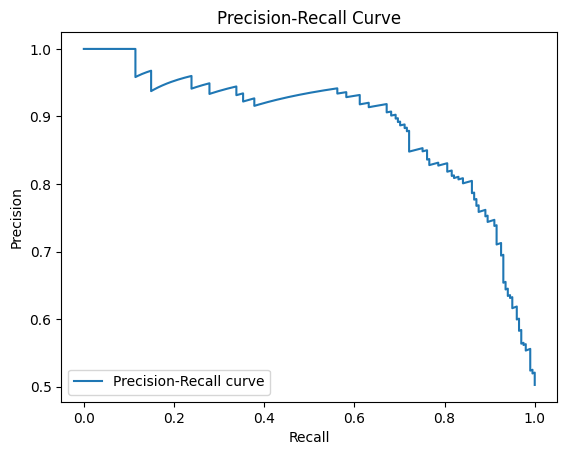

In [20]:
# Convert labels to binary (e.g., 0 for 'neg' and 1 for 'pos')
y_test_binary = [1 if label == 'pos' else 0 for label in y_test]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

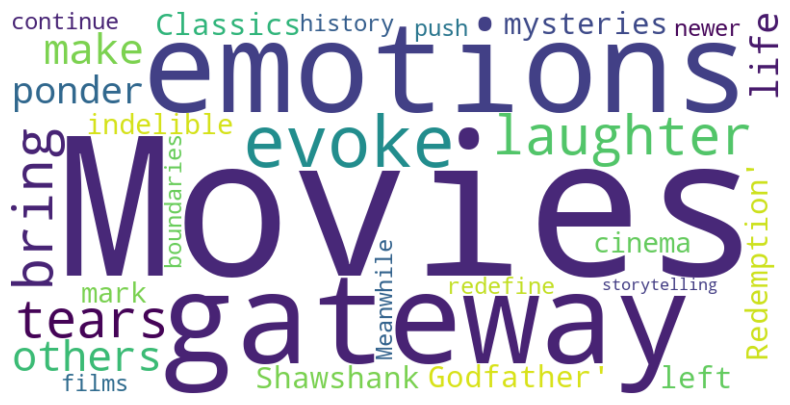

In [4]:
sample_text = """
Movies are a gateway to emotions. Some evoke laughter, some bring tears, 
and others make you ponder on life's mysteries. Classics like 'The Godfather' 
or 'The Shawshank Redemption' have left an indelible mark on cinema history. 
Meanwhile, newer films continue to push boundaries and redefine storytelling.
"""

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(sample_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Remove axes
plt.show()